# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [1]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


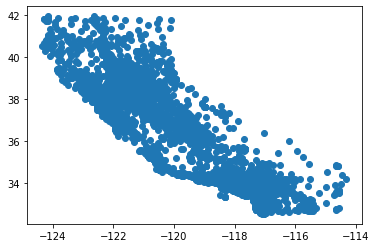

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [5]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [6]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)

[1 1 1 ... 1 1 1]


## Kolay gelsin!

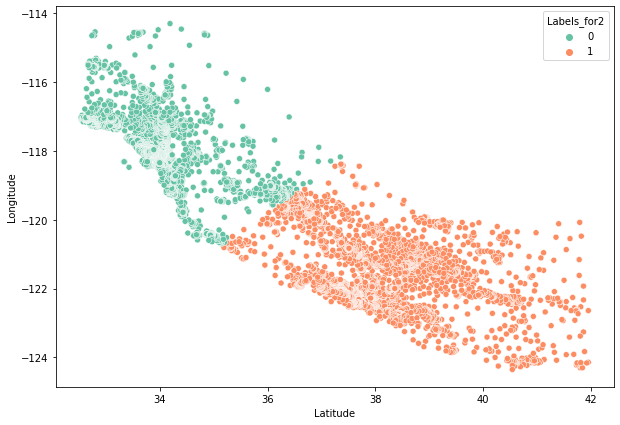

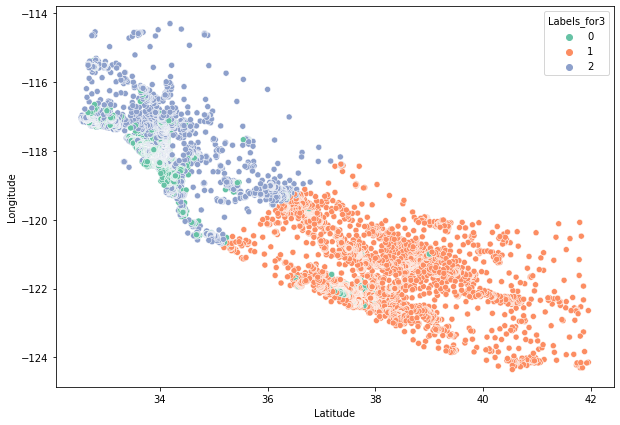

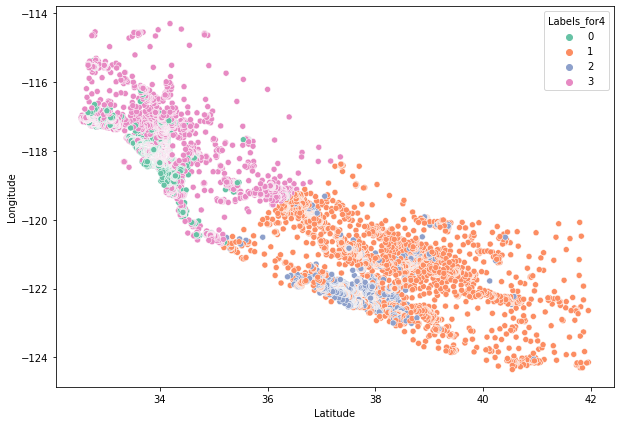

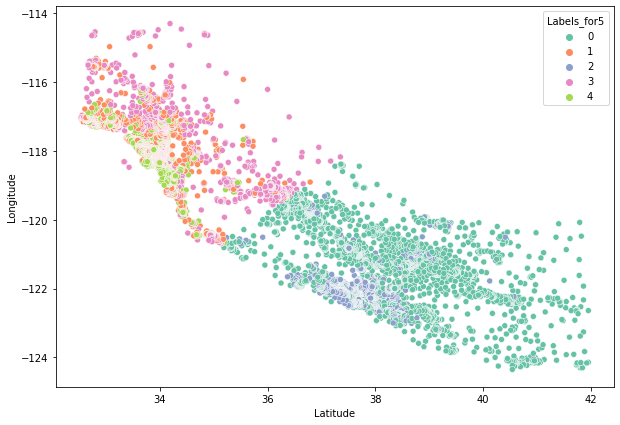

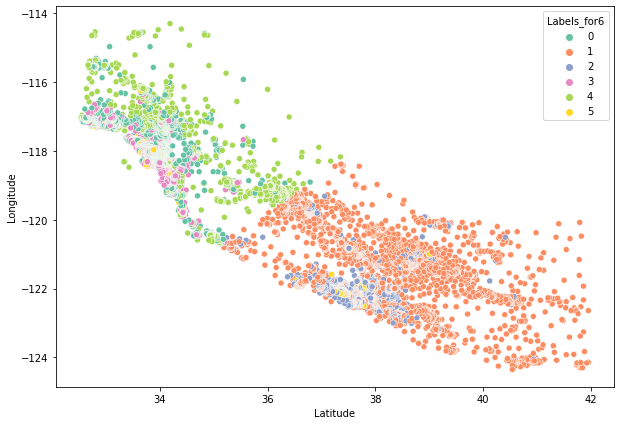

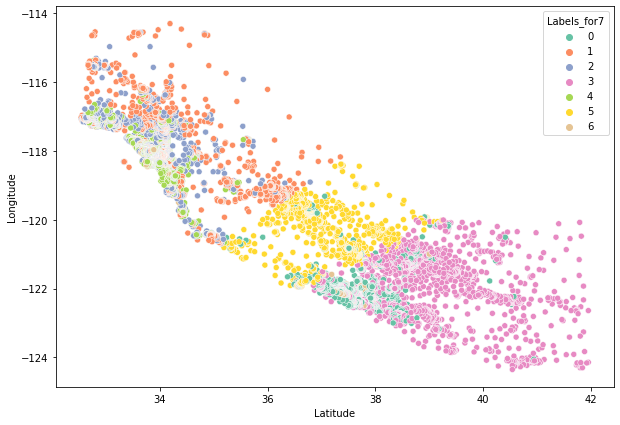

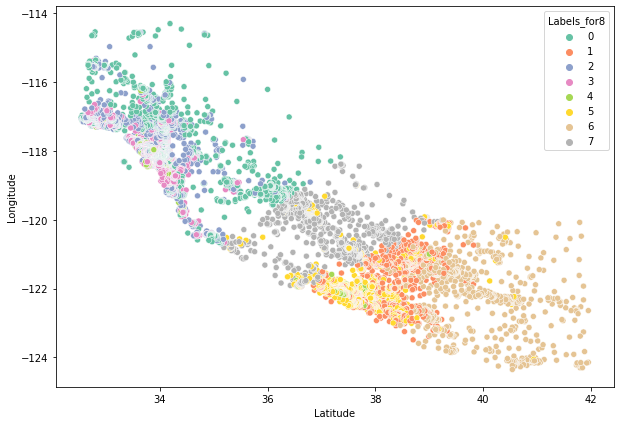

In [7]:
from sklearn.cluster import KMeans
import seaborn as sns
inertias=[]
max_cluster=8
for i in range(2,max_cluster+1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    X[f"Labels_for{i}"] = kmeans.labels_
    plt.figure(figsize=(10,7))
    sns.scatterplot(x="Latitude",y="Longitude",hue=f"Labels_for{i}",data=X,palette="Set2")

In [8]:
# to compute fast  others metrics , I prefer store all k_means label in dataframe
X.head()

,MedInc,Latitude,Longitude,Labels_for2,Labels_for3,Labels_for4,Labels_for5,Labels_for6,Labels_for7,Labels_for8
0,8.3252,37.88,-122.23,1,1,2,2,2,0,5
1,8.3014,37.86,-122.22,1,1,2,2,2,0,5
2,7.2574,37.85,-122.24,1,1,2,2,2,0,5
3,5.6431,37.85,-122.25,1,1,2,2,2,0,5
4,3.8462,37.85,-122.25,1,1,1,0,1,3,1


In [9]:
inertias

[101042.1168227169,
 73600.4939556383,
 57262.38868597146,
 49840.300083333976,
 43319.65387011789,
 38023.39963808587,
 34409.39131683382]

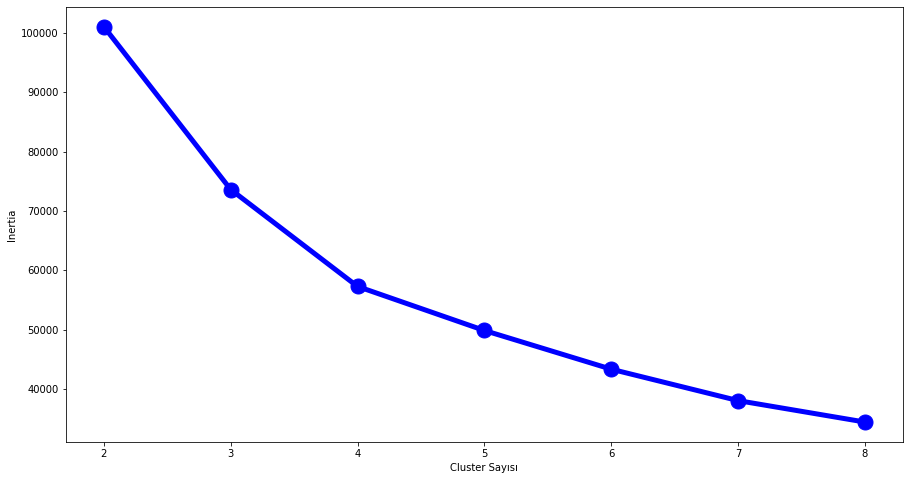

In [10]:
plt.figure(figsize=(15,8))
plt.plot([2, 3, 4, 5, 6, 7, 8], inertias, 'bo-', linewidth=5, markersize=15)
plt.xlabel('Cluster Sayısı')
plt.ylabel('Inertia')
plt.show()

## Silhouette Score

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_scores=[]
for i in range(2,max_cluster+1):
    score = silhouette_score(X, X[f"Labels_for{i}"])
    silhouette_scores.append(score)
    print(f"Silhouetter Score with {i} cluster: {score}")

Silhouetter Score with 2 cluster: 0.4310934435565281
Silhouetter Score with 3 cluster: 0.48992724673149113
Silhouetter Score with 4 cluster: 0.512509019967523
Silhouetter Score with 5 cluster: 0.6129106587498119
Silhouetter Score with 6 cluster: 0.6201210214813194
Silhouetter Score with 7 cluster: 0.6508994665532821
Silhouetter Score with 8 cluster: 0.7111970336116852


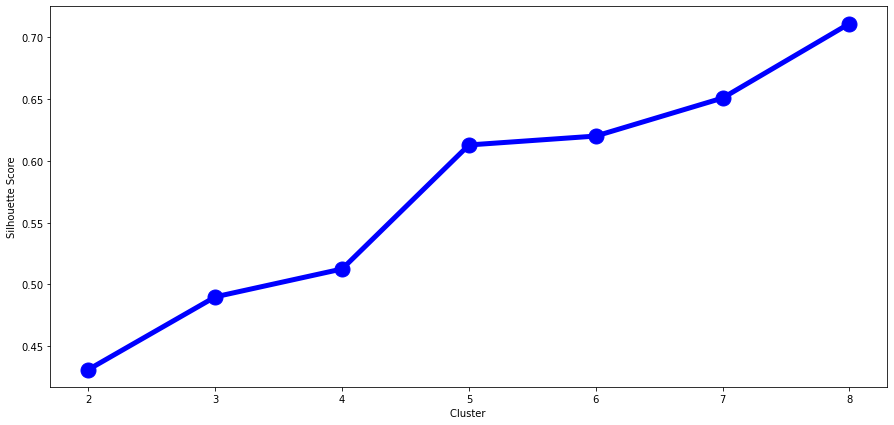

In [13]:
#visulazation silhoutter score
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], silhouette_scores, 'bo-', linewidth=5, markersize=15)
plt.xlabel('Cluster ')
plt.ylabel('Silhouette Score')
plt.show()